In [1]:
from pathlib import Path
from functools import partial

import numpy as np
import matplotlib.pyplot as plt

from boplay.acq_funs.mes_utils import sample_yn1_ymax
from boplay.kernels import se_kernel
from boplay.gp import GaussianProcess

import scienceplots

# plt.style.use(['science','no-latex'])
plt.rcParams.update({"text.usetex": True})
plt.style.use(['science', 'grid', 'retro'])


In [2]:
np.random.seed(0)
import boplay

# the parent of the module
SAVE_DIR = Path(boplay.__file__).parent.parent / "paper_plots"
print(f"Pics will be saved to: {SAVE_DIR}")

Pics will be saved to: /lambda/nfs/nethome-us-west-1/michaelp/MES_VI/paper_plots


# Generate Data to Plot

In [3]:


idx_train = np.array([0, 50, 90])

# Generate data to plot
n_yn1 = 41
n_ymax = 1000

# make a grid of x-values
x_grid = np.linspace(0, 100, 101).reshape(-1, 1)
n_x = x_grid.shape[0]

# make a train set of x-values and y-values
x_train = x_grid[idx_train, :]
y_train = np.asarray([0.5, 0.0, 1]).reshape(-1, 1)
y_best = float(max(y_train))

# make a kernel
kernel = partial(se_kernel, len_scale=10.0, sigma_f=1.0)

# make a Gaussian process
gp = GaussianProcess(x_train=x_train, y_train=y_train, kernel=kernel)

# get the mean and covariance of the Gaussian process
y_mean, y_cov = gp.predict(x_test=x_grid)

np.random.seed(0)
y_n1_samples, y_func_samples, y_max_samples, _ = sample_yn1_ymax(
    y_mean=y_mean,
    y_cov=y_cov,
    n_yn1=n_yn1,
    n_ymax=n_ymax,
)




/tmp/ipykernel_3904335/60253447.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_best = float(max(y_train))


# Subsample points to make the plot nice and readable

Saved figure to /lambda/nfs/nethome-us-west-1/michaelp/MES_VI/paper_plots/yn1_vs_ymax.pdf


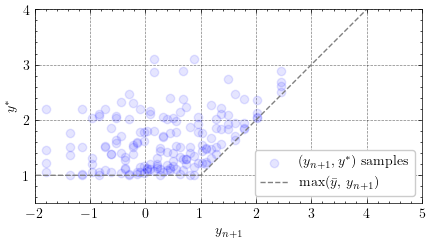

In [4]:
x_idx = 75
np.random.seed(4)

y_n1_samples_x_idx = y_n1_samples[x_idx, :, None]  # (n_yn1, 1)
y_n1_samples_x_idx = np.tile(y_n1_samples_x_idx, (1, n_ymax))  # (n_yn1, n_ymax)
y_max_samples_x_idx = y_max_samples[x_idx, :, :]  # (n_ymax, n_yn1)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

y_max_label = r"$(y_{n+1}, y^*)$ samples"
for i in range(n_yn1):
    plot_idx = np.random.choice(n_ymax, replace=False, size=4)
    ax.scatter(
        y_n1_samples_x_idx[i, plot_idx],
        y_max_samples_x_idx[i, plot_idx],
        color="blue",
        alpha=0.1,
        label=y_max_label,
    )
    y_max_label = None

ax.plot([-100, y_best, 100], [y_best, y_best, 100], linestyle="--", color="grey",
label=r"max($\bar{y}$, $y_{n+1}$)")
ax.set_xlim(-2, 5)
ax.set_ylim(y_best - 0.5, 4)
ax.set_aspect("equal")
ax.set_xlabel("$y_{n+1}$")
ax.set_ylabel("$y^*$")

ax.legend(loc="lower right")
fig.savefig(SAVE_DIR / "yn1_vs_ymax.pdf")
print("Saved figure to", SAVE_DIR / "yn1_vs_ymax.pdf")